# Deep Solaris Notebook for Automatic Filtering of  PDOK, Wallonia Dop25 data and NRW Dop10, Dop20 data.

OWSLIB is a library that allows to deal with the WMS protocol that is an automated protocol to download geoTIFF images from HTTP services published online. <br>
This notebook shows how to download and filter dop10, dop20 and dop25 images from Germany and the Netherlands. <br>



First of all there are a set of WMS services that allow us to simply query an HTTP link and get a map
From an area, provided that we know the gps coordinates of an area.
the most prominent WMS service from the Netherlands is PDOK and it allows to query with a 25cm per pixel
and it allows for both RGB and Infrarred
 
The link for RGB:
https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?&request=GetCapabilities<BR>
The link for Infrared:
https://geodata.nationaalgeoregister.nl/luchtfoto/infrarood/wms?&request=GetCapabilities<BR>

The Netherlands register allows also to query by year, with a maximum 5 years period, which may allow
reasoning of multiple types concerning the map.

The link for NRW (North Rhine Westphalia) provides both RGB and Infrared possibilities in the layers that can
be directly queried in the http service <BR>
https://www.wms.nrw.de/geobasis/wms_nw_dop


The interesting thing about the data from NRW is that it allows a maximum resolution of 10cm per pixel.
WSM services are though able to rescale the tiles returned to the requester, meaning that implicitly the 
data of NRW could be served with dop10, dop20 or dop25 resolution on demand.

Below we proceed with an analysis of the data for NRW and the Netherlands.

The code for this report has an illustrative purpose, therefore code repetitions
may happen to simplify the discussion.

NRW Energy Atlas:
 http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?SERVICE=WMS&REQUEST=GetCapabilities
 
 
 
 "area" :
   {
       "description" : "Heerlen",
       "epsg" : "epsg:4326",
       "top_left" :
       {
           "lat" : 50.9342223,
           "lon" : 5.9163049
       },
       "bottom_right" :
       {
           "lat" : 50.8184032,
           "lon" : 6.0263794
       }
   },
 


# North Rhine Westphalia Energie Atlas, Link


In [1]:
# imporrts
from owslib.wms import WebMapService


In [2]:
from math import ceil
ceil(2.3)

3

In [2]:
wms = WebMapService('http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?SERVICE=WMS&REQUEST=GetCapabilities', version="1.1.1")


In [3]:
print(list(wms.contents))

print(wms['Freiflaechen_PV'].boundingBox)
print( wms['Freiflaechen_PV'].styles)
print(wms['Freiflaechen_PV'].boundingBoxWGS84)
print( wms['Freiflaechen_PV'].crsOptions)

print([op.name for op in wms.operations])
print(wms.getOperationByName('GetMap').methods)
print(wms.getOperationByName('GetMap').formatOptions)


['wms_ee_03_2015_1', 'Windenergieanlagen', 'Wasserkraft', 'Klaranlagen', 'Grubengas', 'Freiflaechen_PV', 'Biomasseanlagen']
(278000.0, 5560000.0, 536000.0, 5828000.0, 'EPSG:25832')
{'default': {'title': 'default', 'legend': 'http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?version=1.1.1&service=WMS&request=GetLegendGraphic&layer=Freiflaechen_PV&format=image/png&STYLE=default'}}
(5.72499, 50.1506, 9.53154, 52.602)
['EPSG:4326', 'EPSG:28992', 'EPSG:3034', 'EPSG:4258', 'EPSG:3857', 'EPSG:3045', 'EPSG:3035', 'EPSG:25833', 'EPSG:3043', 'EPSG:25831', 'EPSG:3044', 'EPSG:25832', 'EPSG:31467', 'EPSG:31466']
['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'DescribeLayer', 'GetLegendGraphic', 'GetStyles']
[{'type': 'Get', 'url': 'http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?'}, {'type': 'Post', 'url': 'http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?'}]
['image/png', 'image/jpeg', 'image/png; mode=8bit', 'image/tiff', 'application/vnd.google-earth.kml+xml', 'application/vnd.go

In [4]:
# this prints the whole NRW in a 300, 250 image, just to see that we are in the right place.
img = wms.getmap(   layers=['Freiflaechen_PV'], styles=['default'], srs='EPSG:4326',
                bbox=(5.72499, 50.1506, 9.53154, 52.602), 
                 size=(300, 250), format='image/jpeg', transparent=True)

************* http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?service=WMS&version=1.1.1&request=GetMap&layers=Freiflaechen_PV&styles=default&width=300&height=250&srs=EPSG%3A4326&bbox=5.72499%2C50.1506%2C9.53154%2C52.602&format=image%2Fjpeg&transparent=TRUE&bgcolor=0xFFFFFF&exceptions=application%2Fvnd.ogc.se_xml************


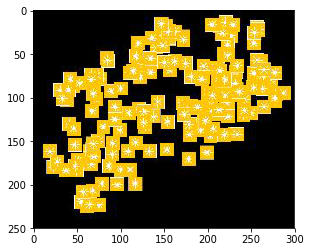

In [7]:
#plt.imshow(img.read())
#plt.show()

out = open('SolarPanelsMap.jpg', 'wb')
print("************* " + img.geturl() + "************")
out.write(img.read())
out.close()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgl=mpimg.imread('SolarPanelsMap.jpg')
imgplot = plt.imshow(imgl)

plt.show() #there you go.

# North Rhine Westphalia Analysis

In [6]:
from owslib.wms import WebMapService

wms = WebMapService('https://www.wms.nrw.de/geobasis/wms_nw_dop', version='1.1.1')

#wms = WebMapService('http://www.wms.nrw.de/umwelt/erneuerbare_energien_nrw?SERVICE=WMS&REQUEST=GetCapabilities', version="1.1.1")


In [7]:
print(list(wms.contents))

print(wms['nw_dop_rgb'].boundingBox)
print( wms['nw_dop_rgb'].styles)
print(wms['nw_dop_rgb'].boundingBoxWGS84)
print( wms['nw_dop_rgb'].crsOptions)

#EPSG:4326 is the one we want because it is a gps system.


['WMS_NW_DOP', 'nw_dop_utm_info', 'nw_dop_rgb', 'nw_dop_cir', 'nw_dop_nir']
(270100.0, 5550000.0, 550000.0, 5850000.0, 'EPSG:25832')
{'default': {'title': 'default', 'legend': 'https://www.wms.nrw.de/geobasis/wms_nw_dop?request=GetLegendGraphic&format=image/png&layer=keine_legende'}}
(5.59334, 50.0578, 9.74158, 52.7998)
['EPSG:4326', 'EPSG:5652', 'EPSG:3035', 'EPSG:4647', 'EPSG:28992', 'EPSG:25833', 'EPSG:31466', 'EPSG:3044', 'EPSG:5649', 'EPSG:3034', 'EPSG:25831', 'EPSG:5651', 'EPSG:31467', 'EPSG:25832', 'EPSG:5653', 'EPSG:5650', 'EPSG:3045', 'EPSG:3043', 'EPSG:4258', 'EPSG:3857']


In [ ]:
print([op.name for op in wms.operations])
print(wms.getOperationByName('GetMap').methods)
print(wms.getOperationByName('GetMap').formatOptions)

In [ ]:
# this prints the whole NRW in a 300, 250 image, just to see that we are in the right place.
#EPSG:4326 is the one we want because it is a gps system.
img = wms.getmap(   layers=['nw_dop_rgb'], styles=['default'], srs='EPSG:4326',
                bbox=(5.59334, 50.0578, 9.74158, 52.7998), 
                 size=(300, 250), format='image/jpeg', transparent=True)

In [ ]:
#plt.imshow(img.read())
#plt.show()
# Save image 
out = open('attempt2.jpg', 'wb')
out.write(img.read())
out.close()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgl=mpimg.imread('attempt2.jpg')
imgplot = plt.imshow(imgl)

plt.show() #there you go.

## Interesting longitudes and latitudes for the project in NRW

Aachen: center = (6.08342,50.77664) <BR> 
Bonn: bonn_center=(7.0982, 50.7374) <BR>
Essen:  essen_center=(7.0116, 51.4556) <BR>
Dortmund: dortmun_center=(7.4653,51.5136) <BR>
Duisburg: duisburg_center=(6.7623,51.4344) <BR>
Monschau: monschau_center= (6.256389,50.56) <BR>
Bochum: center = (7.216236, 51.481846) <BR>
koln residential area: center = (7.060243,50.882887) <BR>
Dusseldorf: center = (6.77616,51.22172) <BR>

simply use them below, by changing loc.

Below epsg:4326 allows to specify the GPS coordinates
while epsg:3857 allows to specify things in meters.


In [8]:
from pyproj import Proj, transform


center= (6.7623,51.4344) #(6.7623,51.4344) #(6.77616,51.22172) 
#(7.0982, 50.7374) #(7.216236, 51.481846)
#(6.256389,50.56)#(6.7623,51.4344) #(7.4653,51.5136)#(7.0116, 51.4556)#(6.0839,50.7753)
loc = center


In [34]:
#Like the code above, but as a function.
from pyproj import Proj, transform

#Remember that to avoid an overlap one has to take x2 the size of the image for the sliding.
def slide_location(loc,xmeters,ymeters,xtimes,ytimes):
    outProj = Proj(init='epsg:3857') # https://epsg.io/3857, basically it allows me to specify things in meters..
    inProj = Proj(init='epsg:4326') # https://epsg.io/4326
    x, y = transform(inProj,outProj,loc[0],loc[1])
    locs = []
    #in GPS
    #locs.append(loc)
    for i in range(xtimes):
        for j in range(ytimes):
            x = x + xmeters*i
            y = y + ymeters*j
            x_gps,y_gps=transform(outProj,inProj,x,y)
            loc = (x_gps,y_gps)
            locs.append(loc)
    return locs

#checking manually the behaviour of slide location, city center of aachen

locs=slide_location(loc, xmeters=2000,ymeters=2000,xtimes=3,ytimes=3) 
#should provi
print(locs)


def img_selector(wms,layer,img_format,loc, styles=None , x_meters=1000,y_meters=1000, x_pixels=5000,y_pixels =5000):
    outProj = Proj(init='epsg:3857') # https://epsg.io/3857, basically it allows me to specify things in meters..
    inProj = Proj(init='epsg:4326') # https://epsg.io/4326
    x, y = transform(inProj,outProj,loc[0],loc[1])
    region_size = (x_meters, y_meters)
    xupper = int(round(x - region_size[0] / 2))
    xlower = int(round(x + region_size[0] / 2))
    yupper = int(round(y - region_size[1] / 2))
    ylower = int(round(y + region_size[1] / 2))
    bbox = (xupper, yupper, xlower, ylower)
    if not styles==None:
        print("*****************")
        print("wms:{}, layers:{}, bbox:{}".format(wms,layer,bbox))
        print("*****************")
        img = wms.getmap(layers=[layer], styles=['default'], srs='EPSG:3857',
                     bbox=bbox, 
                     size=(x_pixels, y_pixels), format=img_format, transparent=True)
        print("get img info")
    else:
    
        img = wms.getmap(layers=[layer], srs='EPSG:3857',
                     bbox=bbox, 
                     size=(x_pixels, y_pixels), format=img_format, transparent=True)

    return img


[(6.762299999999996, 51.43439999999999), (6.762299999999996, 51.445599006368504), (6.762299999999996, 51.467988781770345), (6.780266305682387, 51.467988781770345), (6.798232611364777, 51.47917955129569), (6.816198917047168, 51.501552855227864), (6.852131528411949, 51.501552855227864), (6.88806413977673, 51.51273539012886), (6.92399675114151, 51.53509222703871)]


In [21]:
center=(6.7623,51.4344)  #(6.7623,51.4344) #(6.77616,51.22172) 
#(7.0982, 50.7374) #(7.216236, 51.481846)
#(6.256389,50.56)#(6.7623,51.4344) #(7.4653,51.5136)#(7.0116, 51.4556)#(6.0839,50.7753)
loc = center

In [ ]:
# Contain solar panel: (7.0120, 51.4556) , (6.08382,50.77694)

In [35]:
import io
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import traceback
from tqdm import tqdm

layer = 'nw_dop_rgb'
img_format = "image/tiff"
style='default'
x_meters = 500
y_meters = 500
x_pixels = 5000
y_pixels = 5000

locs = slide_location(loc,xmeters=1000,ymeters=1000,xtimes=1,ytimes=1)

images = []
for loc in tqdm(locs):
    img = img_selector(wms,layer,img_format,loc, styles=style , x_meters=x_meters,y_meters=y_meters, x_pixels=x_pixels,y_pixels =y_pixels)
    mybyteimg = img.read()
    image = Image.open(io.BytesIO(mybyteimg))
    images.append(image)
    
image1 = images[0]
image1.save("center_bochum_0.tiff")

  0%|          | 0/1 [00:00<?, ?it/s]

*****************
wms:<owslib.map.wms111.WebMapService_1_1_1 object at 0x10fdddac8>, layers:nw_dop_rgb, bbox:(752526, 6698247, 753026, 6698747)
*****************


100%|██████████| 1/1 [00:55<00:00, 55.47s/it]

get img info


In [16]:
name = "center_bochum"
#for i in range(len(images)):
#    images[i].save(name+"_"+str(i)+".tiff")
    #out = open(, 'wb')
    #out.write(images[i].tobytes())
    #out.close()

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

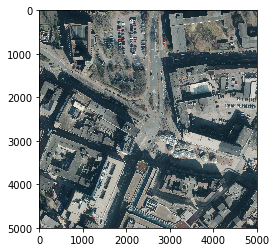

In [17]:
image_name='center_bochum_0'

imgl=mpimg.imread(image_name + ".tiff")# for the moment I select manually   



imgplot = plt.imshow(imgl)

plt.show() #there you go.

## Splitting the image in tiles of MxN pixels.

we selected a 75x75 image size because it roughly correspond to 14 (dop20) to 21 (dop25) meters, that typically comprises the dimension of a roof/building.

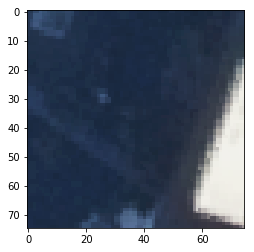

In [5]:
import cv2 

M = 75
N = 75
tiles = [imgl[x:x+M,y:y+N] for x in range(0,imgl.shape[0],M) for y in range(0,imgl.shape[1],N)]

for i in range(0,len(tiles)):
    tiles[i]=cv2.cvtColor(tiles[i], cv2.COLOR_RGBA2RGB)

plt.imshow(tiles[100])

plt.show() #there you go. 

# Filtering using a neural network trained on a seed data set of NRW.

In [6]:
#code to set tensorflow backend

!set "KERAS_BACKEND=tensorflow"

import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras; import keras.backend
if keras.backend.backend() != 'tensorflow':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('tf')
    print("Backend ok")

/Users/chenxi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Backend ok


In [7]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D,MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
from keras.models import Model
import models

model = models.vgg16_model(False)
#model.summary()
model.load_weights("vgg16_3t_wmp_wr_aachen__06_0.89.hdf5")

input_1 is not trainable
block1_conv1 is not trainable
block1_conv2 is not trainable
block1_pool is not trainable
block2_conv1 is not trainable
block2_conv2 is not trainable
block2_pool is not trainable
block3_conv1 is not trainable
block3_conv2 is not trainable
block3_conv3 is not trainable
block3_pool is not trainable
block4_conv1 is not trainable
block4_conv2 is not trainable
block4_conv3 is not trainable
block4_pool is not trainable
block5_conv1 is not trainable
block5_conv2 is not trainable
block5_conv3 is trainable
block5_pool is trainable


In [8]:
import numpy as np
from PIL import Image
import traceback
import os, os.path
import errno

negFilePath = "./predictions/neg/"
posFilePath = "./predictions/pos/"

if not os.path.isdir(negFilePath):
    os.makedirs(negFilePath)
if not os.path.isdir(posFilePath):
    os.makedirs(posFilePath)

satelliteIndex  = []
count = 0
for tile in tiles:
#     print(count)
    try:
        prediction = model.predict(np.expand_dims(tile/255,axis=0))      
#         predicted_class = np.argmax(prediction)
        predicted_class = np.round(prediction)
    
        if predicted_class ==0:
            count = count
        
#             myimg = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
#             cv2.imwrite( negFilePath + image_name+ "_img_"+str(count)+".png",myimg)
          
        if predicted_class ==1:
            print(count)
            satelliteIndex.append(count)
            
            myimg = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
            #cv2.imwrite( posFilePath + image_name+ "_img_"+str(count)+".png",myimg)
          
             
        count+=1
    except: 
        #print("shape")
        traceback.print_exc()
        print(tile.shape)

39
106
112
221
288
310
356
417
441
442
485
510
614
705
1147
1148
1160
1165
1166
1191
1287
1298
1339
1363
1401
1402
1435
1436
1449
1490
1503
1516
1539
1551
1558
1567
1607
1629
1647
1664
1693
1737
1759
1797
1840
1892
1992
2141
2176
2320
2328
2394
2441
2445
2447
2476
2512
2535
2564
2631
2660
2699
2727
2740
2748
2793
2812
2815
2816
2839
2840
2904
2907
2930
2944
2960
2970
3036
3058
3091
3150
3156
3165
3168
3210
3232
3276
3277
3293
3339
3432
3468
3484
3489
3500
3544
3551
3552
3557
3601
3606
3610
3624
3672
3696
3760
3817
3883
3924
3948
3965
3973
4013
4126
4229
4279
4344
4365
4414
4447
4464
4477


In [13]:
len(satelliteIndex)

122

In [18]:
# Mark the pic with circle
from math import ceil

for count in satelliteIndex:
    col = count % ceil(imgl.shape[0] / M)
    row =    int(count / ceil(imgl.shape[0] / M))
    cv2.circle(imgl, (col*M+25,row*M+25), int(M/2), (255,0,0), thickness=5, lineType=8, shift=0) 
markedImg = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
cv2.imwrite("test.jpg", markedImg)

# Test Code
'''
count = 3489 
col = count % ceil(imgl.shape[0] / M)
row =    int(count / ceil(imgl.shape[0] / M))
cv2.circle(imgl, (col*M+25,row*M+25), int(M/2), (255,0,0), thickness=5, lineType=8, shift=0) 
markedImg = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
cv2.imwrite("test.jpg", markedImg)
'''

True

In [ ]:
myimg = cv2.cvtColor(tiles[0], cv2.COLOR_BGRA2RGB)

cv2.imwrite("attempt0.png",myimg)

# PDOK, Netherlands Analysis

In [ ]:
# https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?&request=GetCapabilities

from owslib.wms import WebMapService

wms = WebMapService('https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?&request=GetCapabilities', version='1.1.1')


In [ ]:
#it already provides the evolution in time of the image
print(list(wms.contents)) 

print(wms['Actueel_ortho25'].boundingBox)
print( wms['Actueel_ortho25'].styles)
print(wms['Actueel_ortho25'].boundingBoxWGS84)
print( wms['Actueel_ortho25'].crsOptions)

print([op.name for op in wms.operations])
print(wms.getOperationByName('GetMap').methods)
print(wms.getOperationByName('GetMap').formatOptions)

In [ ]:
# this prints the whole Netherlands in a 300, 250 image, just to see that we are in the right place.
# notice that in this case there is no style available.

img = wms.getmap(layers=['Actueel_ortho25'], srs='EPSG:4326',  
                bbox=(-1.65729160235, 48.0405018704, 12.4317272654, 56.1105896442), 
                size=(3000, 3000), format='image/jpeg', transparent=True)

#plt.imshow(img.read())
#plt.show()

image_name = "netherlands.jpg"

out = open(image_name, 'wb')
out.write(img.read())
out.close()


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgl=mpimg.imread(image_name)
imgplot = plt.imshow(imgl)

plt.show() #Image of the Netherlands.

# Interesting centers for the netherlands 

Heerlen: center = (5.9794988,50.8881742)<BR>

In [ ]:
import io
import matplotlib.image as mpimg

loc = (5.9794988,50.8881742)
layer = 'Actueel_ortho25'
img_format = "image/tiff"


locs = slide_location(loc,xmeters=2500,ymeters=2500,xtimes=2,ytimes=2)

images = []
for loc in locs:
    img = img_selector(wms,layer,img_format,loc, styles=None , x_meters=1250,y_meters=1250, x_pixels=5000,y_pixles =5000)
    mybyteimg = img.read()
    image = Image.open(io.BytesIO(mybyteimg))
    images.append(image)

#img = img_selector(layer,img_format,loc, styles=None , x_meters=1250,y_meters=1250, x_pixels=5000,y_pixles =5000)

In [ ]:
name = "center_heerlen"
for i in range(len(images)):
    images[i].save(name+"_"+str(i)+".tiff")
    #out = open(, 'wb')
    #out.write(images[i].tobytes())
    #out.close()

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


imgl=mpimg.imread('center_heerlen_2.tiff')
imgplot = plt.imshow(imgl)

plt.show() #there you go.

In [ ]:
import cv2 

M = 75
N = 75
tiles = [imgl[x:x+M,y:y+N] for x in range(0,imgl.shape[0],M) for y in range(0,imgl.shape[1],N)]

for i in range(0,len(tiles)):
    tiles[i]=cv2.cvtColor(tiles[i], cv2.COLOR_RGBA2RGB)

plt.imshow(tiles[0])

plt.show() #there you go.

In [ ]:
myimg =img.read()


from PIL import Image
import io

image = Image.open(io.BytesIO(myimg))

plt.imshow(image)
plt.show()


In [ ]:
tiff= images[2]

type(mpimg.pil_to_array(tiff))



# Data Belgium


Belgium, Wallonia region, similarly to the Netherlands, provides a 25cm per pixel. <Br>
This is accessible through http://geoportail.wallonie.be <BR>
and through http://metawal.wallonie.be (complete description of the services) <BR>
Most of the region is covered by the aerial images. <BR>
Aerial images are available in RGB and IR format like in the Netherlands and in Germany. <BR>



In [ ]:
#http://geoservices.wallonie.be/arcgis/services/IMAGERIE/ORTHO_MAILLAGE_TUILAGE_2017/MapServer/WMSServer?request=GetCapabilities&service=WMS
#https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wms?&request=GetCapabilities
#http://geoservices.wallonie.be/arcgis/services/IMAGERIE/ORTHO_2017_IR/MapServer/WMSServer?request=GetCapabilities&service=WMS
from owslib.wms import WebMapService

wms = WebMapService('http://geoservices.wallonie.be/arcgis/services/IMAGERIE/ORTHO_2017_IR/MapServer/WMSServer?request=GetCapabilities&service=WMS', version='1.1.1')



In [ ]:
print(list(wms.contents)) 


print(wms['0'].boundingBox)
print( wms['0'].styles)
print(wms['0'].boundingBoxWGS84)
print( wms['0'].crsOptions)

print([op.name for op in wms.operations])
print(wms.getOperationByName('GetMap').methods)
print(wms.getOperationByName('GetMap').formatOptions)


In [ ]:
img = wms.getmap(layers=['0'], srs='EPSG:4326',  
                bbox=(2.654318, 49.426123, 6.651396, 51.110623), 
                size=(3000, 3000), format='image/jpeg', transparent=True)

#plt.imshow(img.read())
#plt.show()

image_name = "belgium.jpg"

out = open(image_name, 'wb')
out.write(img.read())
out.close()


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgl=mpimg.imread(image_name)
imgplot = plt.imshow(imgl)

plt.show() #Image of Belgium.

In [ ]:
import matplotlib.pyplot as plt


loc = (5.56749,50.63373) 
img_format = "image/tiff"
style='default'
layer = '0'

img = img_selector(wms,layer,img_format,loc, styles=style , x_meters=1000,y_meters=1000, x_pixels=500,y_pixels =500)


mybyteimg = img.read()
image = Image.open(io.BytesIO(mybyteimg))

plt.imshow(image)
plt.show()



In [ ]:
import matplotlib.pyplot as plt


plt.imshow(train_images[5])
plt.show()